In [189]:
# Import Libraries : pandas, seaborn, matplotlib, matplotlib.pyplot

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

# Read in the data
df = pd.read_csv(r'C:\Users\steve\Dropbox\Future\Profile\Python\Python\movies.csv')

In [190]:
# Look at data
df.head()
df=df.dropna()
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [191]:
# Is there any missing data?

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
# instead of printing null percent, we can use: 
#for col in df.columns:
#    print(df[col].isnull().value_counts(), "\n")

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
runtime - 0.0%
released - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%
yearcorrect - 0.0%


In [192]:
# What are the Data Types?
print(df.dtypes.sort_index())

budget         float64
company         object
country         object
director        object
genre           object
gross          float64
name            object
rating          object
released        object
runtime        float64
score          float64
star            object
votes          float64
writer          object
year             int64
yearcorrect      int32
dtype: object


In [193]:
# Changing the data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [194]:
df.head()

,budget,company,country,director,genre,gross,name,rating,runtime,released,score,star,votes,writer,year,yearcorrect
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,146.0,"June 13, 1980 (United States)",8.4,Jack Nicholson,927000,Stephen King,1980,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,104.0,"July 2, 1980 (United States)",5.8,Brooke Shields,65000,Henry De Vere Stacpoole,1980,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,124.0,"June 20, 1980 (United States)",8.7,Mark Hamill,1200000,Leigh Brackett,1980,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,88.0,"July 2, 1980 (United States)",7.7,Robert Hays,221000,Jim Abrahams,1980,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,98.0,"July 25, 1980 (United States)",7.3,Chevy Chase,108000,Brian Doyle-Murray,1980,1980


In [228]:
# The release and year column should match
df['yearcorrect'] = df['released'].astype(str).str.split().str[2]
df.head()

,budget,company,country,director,genre,gross,name,rating,runtime,released,score,star,votes,writer,year,yearcorrect
5445,237000000,1382,47,785,0,2847246203,386,5,162.0,527,7.8,1534,1100000,1263,2009,NaN
7445,356000000,983,47,105,0,2797501328,388,5,181.0,137,8.4,1470,903000,513,2019,NaN
3045,200000000,1382,47,785,6,2201647264,4909,5,194.0,534,7.8,1073,1100000,1263,1997,NaN
6663,245000000,945,47,768,0,2069521700,3643,5,138.0,529,7.8,356,876000,1806,2015,NaN
7244,321000000,983,47,105,0,2048359754,389,5,149.0,145,8.4,1470,897000,513,2018,NaN


In [196]:
#Sort by Gross Profit
df = df.sort_values(by = ['gross'], inplace=False, ascending=False)

In [229]:
# If we want to look at all the data
pd.set_option('display.max_rows', (None))

df.head()

,budget,company,country,director,genre,gross,name,rating,runtime,released,score,star,votes,writer,year,yearcorrect
5445,237000000,1382,47,785,0,2847246203,386,5,162.0,527,7.8,1534,1100000,1263,2009,NaN
7445,356000000,983,47,105,0,2797501328,388,5,181.0,137,8.4,1470,903000,513,2019,NaN
3045,200000000,1382,47,785,6,2201647264,4909,5,194.0,534,7.8,1073,1100000,1263,1997,NaN
6663,245000000,945,47,768,0,2069521700,3643,5,138.0,529,7.8,356,876000,1806,2015,NaN
7244,321000000,983,47,105,0,2048359754,389,5,149.0,145,8.4,1470,897000,513,2018,NaN


In [198]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [230]:
df.head()

,budget,company,country,director,genre,gross,name,rating,runtime,released,score,star,votes,writer,year,yearcorrect
5445,237000000,1382,47,785,0,2847246203,386,5,162.0,527,7.8,1534,1100000,1263,2009,NaN
7445,356000000,983,47,105,0,2797501328,388,5,181.0,137,8.4,1470,903000,513,2019,NaN
3045,200000000,1382,47,785,6,2201647264,4909,5,194.0,534,7.8,1073,1100000,1263,1997,NaN
6663,245000000,945,47,768,0,2069521700,3643,5,138.0,529,7.8,356,876000,1806,2015,NaN
7244,321000000,983,47,105,0,2048359754,389,5,149.0,145,8.4,1470,897000,513,2018,NaN


In [200]:
# What is the correclation (hypothetical: budget & company will have high C with Gross Earnings)


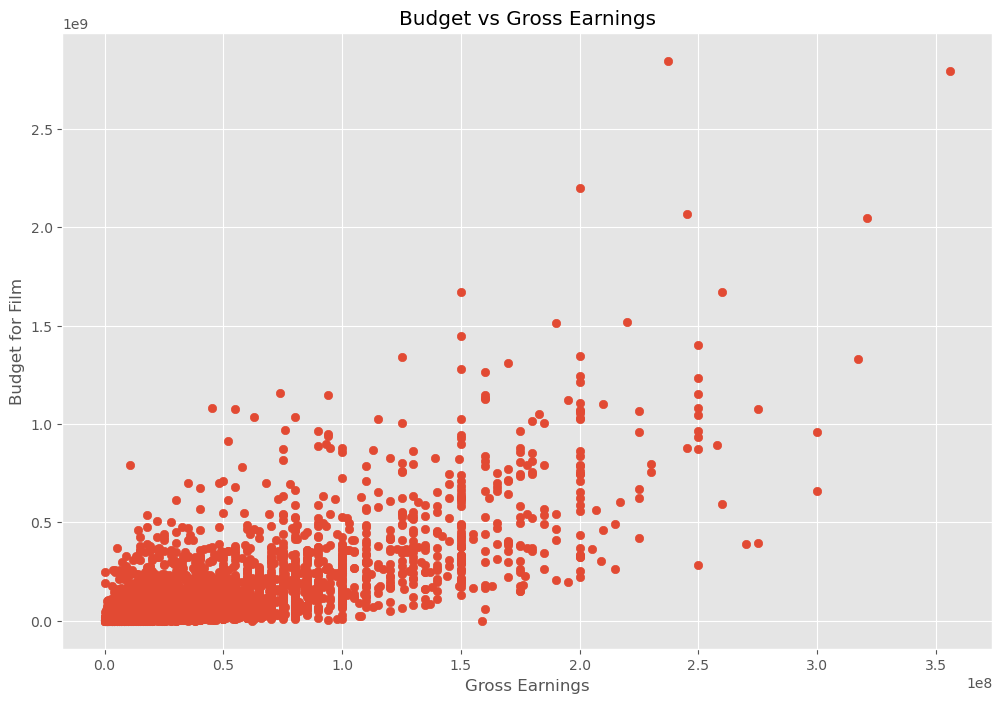

In [201]:
# Build a scatterplot and compare budget vs. gross revenuej (add info for titles)
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

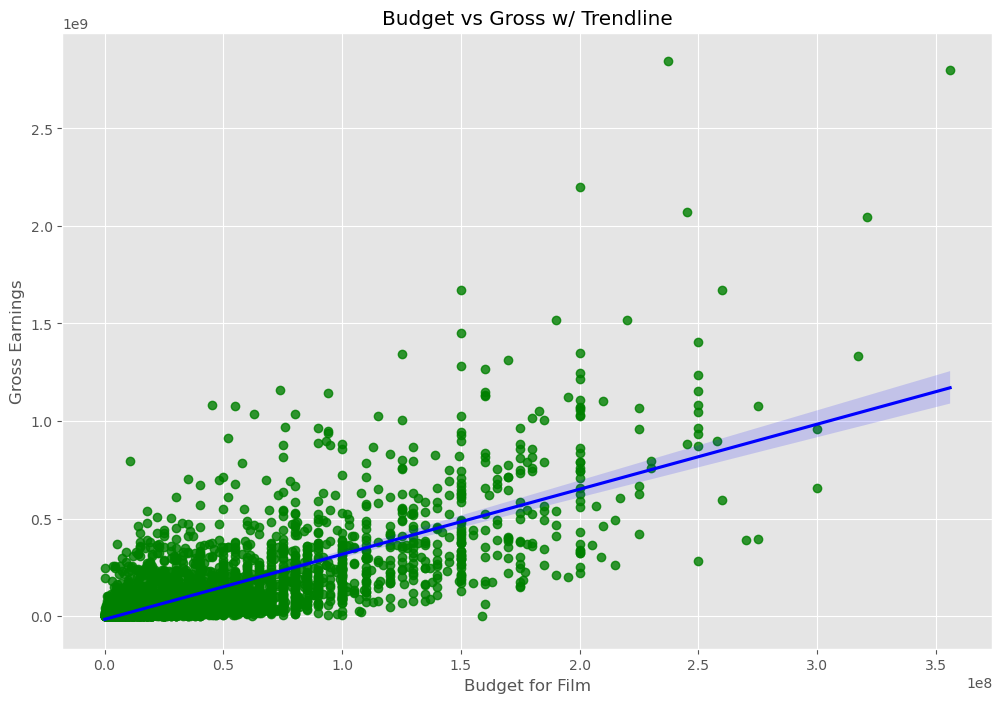

In [202]:
# Regression Plot to Show a more visual correlation (Budget vs. Gross)
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "green"}, line_kws={"color": "blue"})
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.title('Budget vs Gross w/ Trendline')
plt.show()

In [203]:
# shows a positive correlation as the trendline is going up

In [204]:
#This only shows correlation on numbers, there are types of correlation (pearson (is default), kendall, spearman)

df.corr(numeric_only=True, method='pearson')
#df.corr(numeric_only=True, method='kendall')
#df.corr(numeric_only=True, method='spearman')


,budget,gross,runtime,score,votes,year
budget,1.000000,0.740247,0.318695,0.072001,0.439675,0.327722
gross,0.740247,1.000000,0.275796,0.222556,0.614751,0.274321
runtime,0.318695,0.275796,1.000000,0.414068,0.352303,0.075077
score,0.072001,0.222556,0.414068,1.000000,0.474256,0.056386
votes,0.439675,0.614751,0.352303,0.474256,1.000000,0.206021
year,0.327722,0.274321,0.075077,0.056386,0.206021,1.000000


In [205]:
#Looks like budget to gross, then gross to votes

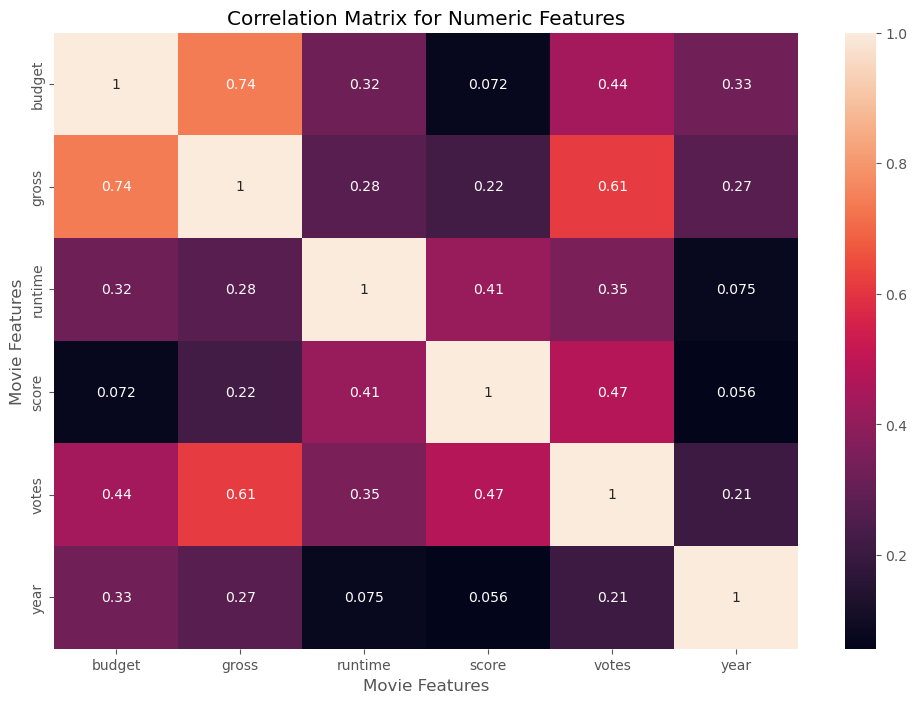

In [206]:
correlation_matrix= df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title('Correlation Matrix for Numeric Features')
plt.show()
#Lighter colors are highter correlation

In [227]:
#Looking at all, i.e. company is not numeric, but we can change this to numeric values to include it in correlation

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] =df_numerized[col_name].cat.codes
        
df_numerized.head()


,budget,company,country,director,genre,gross,name,rating,runtime,released,score,star,votes,writer,year,yearcorrect
5445,237000000,1382,47,785,0,2847246203,386,5,162.0,527,7.8,1534,1100000,1263,2009,31
7445,356000000,983,47,105,0,2797501328,388,5,181.0,137,8.4,1470,903000,513,2019,41
3045,200000000,1382,47,785,6,2201647264,4909,5,194.0,534,7.8,1073,1100000,1263,1997,19
6663,245000000,945,47,768,0,2069521700,3643,5,138.0,529,7.8,356,876000,1806,2015,37
7244,321000000,983,47,105,0,2048359754,389,5,149.0,145,8.4,1470,897000,513,2018,40


In [208]:
print(df.dtypes.sort_index())

budget           int64
company          int16
country           int8
director         int16
genre             int8
gross            int64
name             int16
rating            int8
released         int16
runtime        float64
score          float64
star             int16
votes            int64
writer           int16
year             int64
yearcorrect       int8
dtype: object


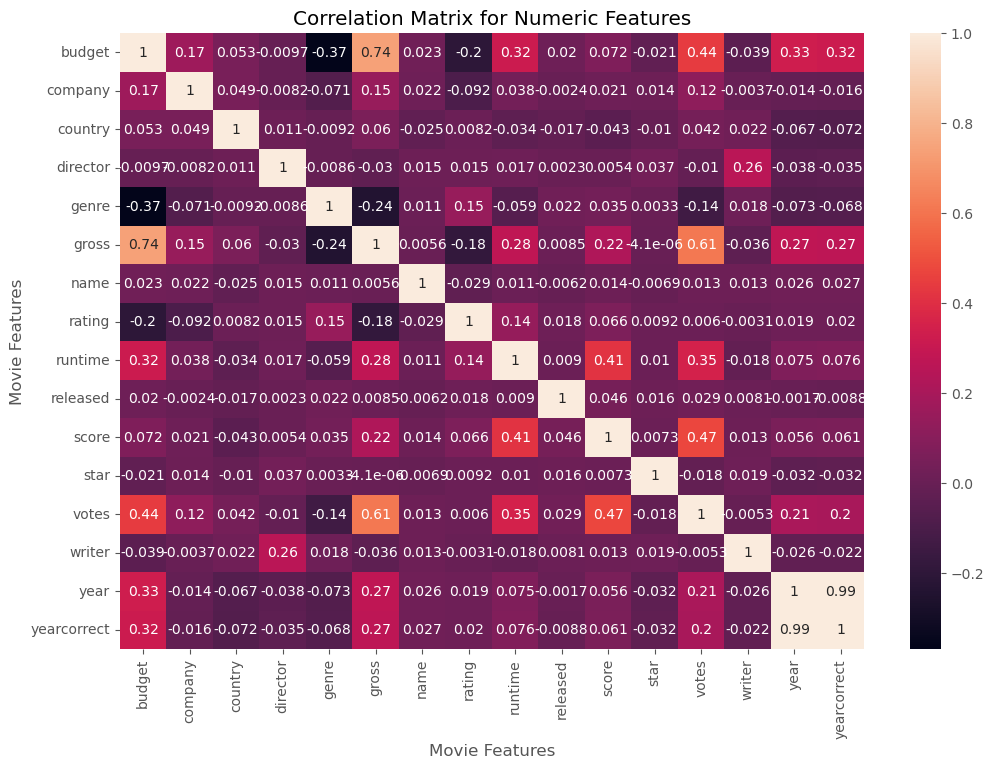

In [210]:
correlation_matrix= df_numerized.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [214]:
correlation_mat = df_numerized.corr(numeric_only=True, method='pearson')
correlation_mat

,budget,company,country,director,genre,gross,name,rating,runtime,released,score,star,votes,writer,year,yearcorrect
budget,1.000000,0.170235,0.052977,-0.009662,-0.368523,0.740247,0.023392,-0.203946,0.318695,0.019952,0.072001,-0.021473,0.439675,-0.039466,0.327722,0.320216
company,0.170235,1.000000,0.048569,-0.008223,-0.071334,0.149553,0.021697,-0.092357,0.037585,-0.002407,0.020656,0.014082,0.118470,-0.003697,-0.014333,-0.016150
country,0.052977,0.048569,1.000000,0.011133,-0.009164,0.060078,-0.025490,0.008230,-0.034477,-0.017228,-0.043051,-0.009990,0.041551,0.022488,-0.066748,-0.071611
director,-0.009662,-0.008223,0.011133,1.000000,-0.008553,-0.029560,0.015246,0.014656,0.017433,0.002308,0.005413,0.036593,-0.010376,0.261735,-0.038354,-0.035162
genre,-0.368523,-0.071334,-0.009164,-0.008553,1.000000,-0.244101,0.010996,0.147796,-0.059237,0.022142,0.035106,0.003341,-0.135990,0.017578,-0.073167,-0.067962
gross,0.740247,0.149553,0.060078,-0.029560,-0.244101,1.000000,0.005639,-0.181906,0.275796,0.008501,0.222556,-0.000004,0.614751,-0.035885,0.274321,0.268367
name,0.023392,0.021697,-0.025490,0.015246,0.010996,0.005639,1.000000,-0.029234,0.010850,-0.006152,0.014450,-0.006882,0.012615,0.012880,0.025542,0.026784
rating,-0.203946,-0.092357,0.008230,0.014656,0.147796,-0.181906,-0.029234,1.000000,0.140792,0.018083,0.065983,0.009196,0.006031,-0.003149,0.019499,0.019749
runtime,0.318695,0.037585,-0.034477,0.017433,-0.059237,0.275796,0.010850,0.140792,1.000000,0.008975,0.414068,0.010108,0.352303,-0.017561,0.075077,0.076203
released,0.019952,-0.002407,-0.017228,0.002308,0.022142,0.008501,-0.006152,0.018083,0.008975,1.000000,0.045874,0.015706,0.028833,0.008072,-0.001740,-0.008821


In [216]:
correlation_mat = df_numerized.corr(numeric_only=True, method='pearson')

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
             gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
year         genre         -0.073167
genre        year          -0.073167
yearcorrect  country       -0.071611
country      yearcorrect   -0.071611
genre        company       -0.071334
company      genre         -0.071334
yearcorrect  genre         -0.067962
genre        yearcorrect   -0.067962
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
country      score         -0.043051
score        country       -0.043051
writer       budget        -0.039466
b

In [226]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < .99)]
high_corr


votes   gross     0.614751
gross   votes     0.614751
budget  gross     0.740247
gross   budget    0.740247
dtype: float64